In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read the data from Excel and removed unnecessary columns 

df = pd.read_excel('data.xlsx')
df = df.drop('Name', axis = 1)
df = df.drop('Semester', axis = 1)
df = df.drop('Course Code', axis = 1)
df.head(), df.columns

(                                        Course Title    RollNo  \
 0     Special Topics: Foundations of User Experience  16110168   
 1          Humanism, Anti-humanism, and Posthumanism  17110034   
 2          Literary Experiment In European Modernism  17110034   
 3         Special Topics in HSS: Abnormal Psychology  17110034   
 4  Research Methods in Humanities and Social Scie...  18110006   
 
           Program              Department                         Year  
 0    B.Tech (JEE)  Mechanical Engineering  Seventh Year First Semester  
 1  M.Sc (Regular)      Cognitive Sciences    Sixth Year First Semester  
 2  M.Sc (Regular)      Cognitive Sciences    Sixth Year First Semester  
 3  M.Sc (Regular)      Cognitive Sciences    Sixth Year First Semester  
 4    B.Tech (JEE)     Comp Science & Engg   Fifth Year  First Semester  ,
 Index(['Course Title', 'RollNo', 'Program', 'Department', 'Year'], dtype='object'))

In [3]:
# Created a copy of dataframe df_cp

df_cp = df.copy()

In [4]:
# Defined a usr for which we want to recommend some courses 

usr = {'Course Title': 'Special Topics in Management', 'RollNo': '20110072', 'Program' : 'B.Tech (JEE)', 'Department' : 'Comp Science & Engg', 
        'Year': 'Fourth Year Second Semester'}

In [5]:
'''Stored above user in the dataframe df_cp so we can calculate his similarity from all other users 
   who have done the courses '''

df_cp = df_cp.append(usr, ignore_index = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_26036\764291888.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cp = df_cp.append(usr, ignore_index = True)


In [6]:
# set the index of dataframe to roll no 

df_cp = df_cp.set_index('RollNo')

In [7]:
''' Created a feature which has Program and department of student and year in which he/she had done HSS courses  
    and title and course code of the course '''

df_cp['feature'] = df_cp['Program'] +  df_cp['Department'] + df_cp['Course Title'] + df_cp['Year']
df_cp['feature'] = df_cp['feature'].str.lower()

''' We don't need the Program, Department, Year and Course Title attribute '''

df_cp = df_cp.drop('Program', axis = 1)
df_cp = df_cp.drop('Department', axis = 1)
df_cp = df_cp.drop('Course Title', axis = 1)
df_cp = df_cp.drop('Year', axis = 1)

In [8]:
''' Using TF-IDF algorithm we converted feature column consisting of strings to vectors so that we can find 
   Cosine similarity  between them '''
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(df_cp['feature']).toarray()



In [9]:
# shape of vectors matrix 

vectors.shape

(2815, 474)

In [10]:
''' Calculated cosine similarity between vectors and stored them in similarity matrix after that converted it 
    into dataframe. Row 0 and column 1 in dataframe states the cosine similarity of user 0 to user 1 '''
    
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814
0,1.000000,0.210819,0.210819,0.300000,0.381385,0.400000,0.447214,0.600000,0.456435,0.400000,...,0.182574,0.163299,0.223607,0.200000,0.182574,0.223607,0.182574,0.210819,0.447214,0.500000
1,0.210819,1.000000,0.555556,0.527046,0.201008,0.421637,0.235702,0.210819,0.192450,0.316228,...,0.288675,0.258199,0.353553,0.316228,0.288675,0.353553,0.192450,0.333333,0.235702,0.210819
2,0.210819,0.555556,1.000000,0.527046,0.201008,0.210819,0.235702,0.210819,0.192450,0.316228,...,0.288675,0.258199,0.353553,0.316228,0.288675,0.353553,0.192450,0.333333,0.235702,0.210819
3,0.300000,0.527046,0.527046,1.000000,0.190693,0.200000,0.223607,0.500000,0.273861,0.600000,...,0.273861,0.244949,0.335410,0.300000,0.273861,0.335410,0.182574,0.316228,0.223607,0.300000
4,0.381385,0.201008,0.201008,0.190693,1.000000,0.572078,0.426401,0.381385,0.522233,0.190693,...,0.435194,0.544949,0.426401,0.381385,0.435194,0.426401,0.348155,0.201008,0.426401,0.572078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,0.223607,0.353553,0.353553,0.335410,0.426401,0.223607,0.250000,0.223607,0.204124,0.335410,...,0.714435,0.730297,0.750000,0.670820,0.714435,1.000000,0.510310,0.353553,0.375000,0.335410
2811,0.182574,0.192450,0.192450,0.182574,0.348155,0.182574,0.204124,0.182574,0.166667,0.182574,...,0.500000,0.521749,0.510310,0.456435,0.500000,0.510310,1.000000,0.288675,0.306186,0.273861
2812,0.210819,0.333333,0.333333,0.316228,0.201008,0.210819,0.235702,0.210819,0.192450,0.210819,...,0.288675,0.258199,0.353553,0.316228,0.288675,0.353553,0.288675,1.000000,0.353553,0.316228
2813,0.447214,0.235702,0.235702,0.223607,0.426401,0.447214,0.500000,0.447214,0.408248,0.223607,...,0.306186,0.273861,0.375000,0.335410,0.306186,0.375000,0.306186,0.353553,1.000000,0.559017


<Axes: >

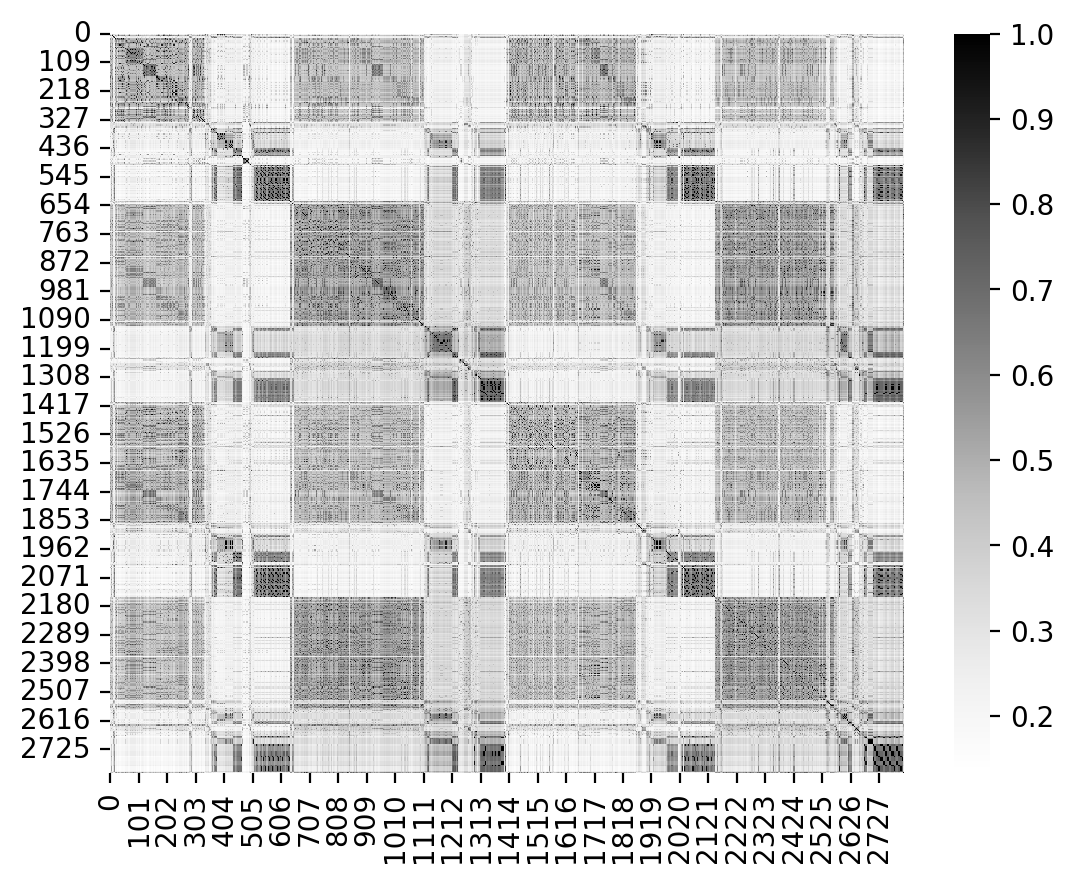

In [11]:
# Heatmap

import seaborn as sns

sns.heatmap(similarity, cmap='Greys')

In [12]:
''' Function for calculating k nearest neighbors '''

def k_nearest_neighbors(A, u, k, sim_matrix):

    # u_index = A.index.get_loc(u)
    pa_ = pd.DataFrame(similarity[df_cp.index.get_loc(u)])
    # print(similarity[df_cp.index.get_loc(17110135)])
    if len(pa_.columns) == 1:
        data = {}
        tr =list(pa_[0])
        for i in range(len(tr)):
            data[i] = []
            data[i].append(tr[i])
        df_ = pd.DataFrame(data)
        k_nearest = np.argsort(df_.iloc[0])[::-1][1:k+1]

    # else: 
    #     pa_ = pa_.drop_duplicates()
    # # pa_.loc[0]
    # # k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    #     k_nearest = np.argsort(pa_.iloc[0])[::-1][1:k+1]
    return A.index[k_nearest]

In [13]:
''' Calculated 20 nearest neighbors of given user which is usr and stored them in array called "ar" '''

usr = usr['RollNo']
ar = k_nearest_neighbors(df_cp, usr, 20, similarity)
ar = np.array(ar)

In [15]:
''' Made this dataframe because from this dataframe we can get the courses which was taken by 
    neighbors of usr  '''
    
cr = pd.read_excel('data.xlsx')
cr = cr.drop('Program', axis = 1)
cr = cr.drop('Department', axis = 1)
cr = cr.drop('Name', axis = 1)
cr = cr.drop('Semester', axis = 1)
cr = cr.drop('Year', axis = 1)
cr

,Course Code,Course Title,RollNo
0,IN 491,Special Topics: Foundations of User Experience,16110168
1,HS 507,"Humanism, Anti-humanism, and Posthumanism",17110034
2,HS 517,Literary Experiment In European Modernism,17110034
3,HS 691-III,Special Topics in HSS: Abnormal Psychology,17110034
4,HS 505,Research Methods in Humanities and Social Scie...,18110006
...,...,...,...
2809,HS 647,"Literature, Theory and Social Contexts",20520032
2810,MS 401,Introduction to Marketing,20520032
2811,MS 406,Business Skills for Entrepreneurs,20560001
2812,HS 424,Indian Systems of Ethics,20570007


In [16]:
''' Set the RollNo as index of dataframe '''

cr = cr.set_index('RollNo')
cr

,Course Code,Course Title
RollNo,,
16110168,IN 491,Special Topics: Foundations of User Experience
17110034,HS 507,"Humanism, Anti-humanism, and Posthumanism"
17110034,HS 517,Literary Experiment In European Modernism
17110034,HS 691-III,Special Topics in HSS: Abnormal Psychology
18110006,HS 505,Research Methods in Humanities and Social Scie...
...,...,...
20520032,HS 647,"Literature, Theory and Social Contexts"
20520032,MS 401,Introduction to Marketing
20560001,MS 406,Business Skills for Entrepreneurs


In [17]:
''' Earlier we stored the RollNo of neighbors in array "ar" Now using that array and above dataframe consisting 
    RollNo as indexes and attributes as Course Code and Course Title we took the courses taken by neigbors of usr 
    and stored them in list "crs". Currently our index is RollNo so we take all the courses that are taken 
    by the neighbor 'x'. there will be case that a user may had taken multiple courses and while finding cosine
    similarity and applying KNN we get the index of feature column which is most similar to the given user now after 
    that we convert this index to RollNo when we return in function k_nearest_neighbors. Doing this our system 
    will recommend also those courses which was taken by his/her neighbors after doing the course of similar interest
    for eg. interest of given user is in 'Ancient India' now his neighbor must have taken a course related to this 
    topic so it will recommend that course and also recommend that course which his/her neighbor had took after 
    doing the course related to Ancient India and we are looking for 20 neighbors other than recommending the course 
    of his/her interest it will also recommend the most popular courses that his/her neighbors had took after doing 
    this 'Ancient Indian Architecture' course. '''

''' Here we can modify our code now suppose we want that our recommendation system only recommended 
    courses based on the interest of usr(given user) then we don't set index of above dataframe to RollNo
    also we need to modify the return value of k_nearest_neighbors currently it will return the rollno 
    of neighbors instead it will return index of the user which is more similar to our usr(giver user)
    i.e neighbors then we access the courses taken by neighbors based on the normal indexes '''

dum = []
crs = []
for i in np.array(cr.index):
    for j in ar:
        if i == j and i not in dum:
            dum.append(i)
            # print(i , j)
            crs.append(np.array(cr.loc[i]['Course Title']))

In [18]:
cr

,Course Code,Course Title
RollNo,,
16110168,IN 491,Special Topics: Foundations of User Experience
17110034,HS 507,"Humanism, Anti-humanism, and Posthumanism"
17110034,HS 517,Literary Experiment In European Modernism
17110034,HS 691-III,Special Topics in HSS: Abnormal Psychology
18110006,HS 505,Research Methods in Humanities and Social Scie...
...,...,...
20520032,HS 647,"Literature, Theory and Social Contexts"
20520032,MS 401,Introduction to Marketing
20560001,MS 406,Business Skills for Entrepreneurs


In [19]:
final_course = []
for i in range(len(crs)):
    if crs[i].size == 1:
        final_course.append(crs[i].item())
    else:
        for j in range(crs[i].size):
            final_course.append(crs[i][j])
        # print(crs[i])
        # final_course.append(crs[i][j])
# dupl_ = list(cr.loc[usr]['Course Title'])
# res = [i for i in final_course if i not in dupl_]
res = final_course
dict_f = {}
for i in range(len(res)):
    if res[i] in dict_f.keys():
        dict_f[res[i]] += 1
    else:
        dict_f[res[i]] = 1
dict_f


{'Special Topics in Management: Entrepreneurship and New Ventures': 2,
 'Special Topics in Management: Social Media Marketing': 5,
 'When You Cannot Experiment: Social Science Methods': 2,
 'Engineering Entrepreneurship': 2,
 'Special Topics in Management: Product Management': 1,
 'Development Economics': 1,
 'Special Topics in HSS: Public Policy & Impact Evaluation': 1,
 'Special Topics in Management: Strategic Leadership': 4,
 'Special Topics in Management: Finance Management': 2,
 'Introduction to Archaeology': 1,
 'Special Topics in HSS: Epidemiology': 3,
 'Special Topics in HSS: Abnormal Psychology': 2,
 'Special topics in Management: Marketing Analytics': 2,
 'Business Communications': 2,
 'Harappan Civilization': 1,
 'Special Topics: Foundations of User Experience': 3,
 'Special Topics in HSS: Challenges in the Digital Society': 1,
 'Urdu Script and Poetry': 1,
 'Special Topics in Management: Alternative business models for sustainable development': 1,
 'Special Topics in HSS: A

In [20]:
results = sorted(dict_f.items(), key=lambda x:x[1])
# print(results)

In [21]:
no_crs = min(10, len(dict_f.keys()))
# sum = 0
for i in range(no_crs):
    # sum += results[len(results)-1-i][1]
    print(results[len(results)-1-i][0], results[len(results)-1-i][1])
# sum

Special Topics in Management: Social Media Marketing 5
Special Topics in Management: Strategic Leadership 4
Principles of Business Management 3
Special Topics in Management: Business Risk Management 3
Special Topics in Management: Digital lnnovation and transformation for Enterprises 3
Special Topics: Foundations of User Experience 3
Special Topics in HSS: Epidemiology 3
Business Skills for Entrepreneurs 2
Sanskrit Literature 2
Business Communications 2


In [22]:
results = list(dict_f.items())
results

[('Special Topics in Management: Entrepreneurship and New Ventures', 2),
 ('Special Topics in Management: Social Media Marketing', 5),
 ('When You Cannot Experiment: Social Science Methods', 2),
 ('Engineering Entrepreneurship', 2),
 ('Special Topics in Management: Product Management', 1),
 ('Development Economics', 1),
 ('Special Topics in HSS: Public Policy & Impact Evaluation', 1),
 ('Special Topics in Management: Strategic Leadership', 4),
 ('Special Topics in Management: Finance Management', 2),
 ('Introduction to Archaeology', 1),
 ('Special Topics in HSS: Epidemiology', 3),
 ('Special Topics in HSS: Abnormal Psychology', 2),
 ('Special topics in Management: Marketing Analytics', 2),
 ('Business Communications', 2),
 ('Harappan Civilization', 1),
 ('Special Topics: Foundations of User Experience', 3),
 ('Special Topics in HSS: Challenges in the Digital Society', 1),
 ('Urdu Script and Poetry', 1),
 ('Special Topics in Management: Alternative business models for sustainable develo

In [23]:
no_crs = min(10, len(dict_f.keys()))
# sum = 0
for i in range(no_crs):
    # sum += results[len(results)-1-i][1]
    print(results[i][0], results[i][1])
# sum

Special Topics in Management: Entrepreneurship and New Ventures 2
Special Topics in Management: Social Media Marketing 5
When You Cannot Experiment: Social Science Methods 2
Engineering Entrepreneurship 2
Special Topics in Management: Product Management 1
Development Economics 1
Special Topics in HSS: Public Policy & Impact Evaluation 1
Special Topics in Management: Strategic Leadership 4
Special Topics in Management: Finance Management 2
Introduction to Archaeology 1


Special Topics in Management: Social Media Marketing 8
Special topics in Management: Marketing Analytics 5
Special Topics: Foundations of User Experience 5
Special Topics in Management: Business Risk Management 4
Sanskrit Literature 4
Special Topics in HSS: Challenges in the Digital Society 4
Special Topics in HSS: Abnormal Psychology 4
Special Topics in Management: Strategic Leadership 4
Principles of Business Management 3
Special Topics in Management: Digital lnnovation and transformation for Enterprises 3
Business Communications 3
Special Topics in Management: Alternative business models for sustainable development 3
Special Topics in HSS: Epidemiology 3
Special Topics in Management: Entrepreneurship and New Ventures 3
Business Skills for Entrepreneurs 2

Special Topics in Management: Entrepreneurship and New Ventures 3
Special Topics in Management: Social Media Marketing 8
When You Cannot Experiment: Social Science Methods 2
Engineering Entrepreneurship 2
Special Topics in Management: Product Management 1
Development Economics 2
Special Topics in HSS: Public Policy & Impact Evaluation 1
Special Topics in Management: Strategic Leadership 4
Special Topics in Management: Finance Management 2
Introduction to Archaeology 1
Special Topics in HSS: Epidemiology 3
Special Topics in HSS: Abnormal Psychology 4
Literary Experiment In European Modernism 1
Tropes of Time and Topography: Select Fiction from South-Asia 1
Special Topics in HSS: Storytelling for the Digital Era 1

Ancient Indian Technology 7
Structures and Hydrology in Ancient India 3
Ancient Indian Architecture 4
Sanskrit Literature 13
Special Topics: Foundations of User Experience 2
Harappan Civilization 10
Urdu Poetry Interpretation 2
Special topics in Management: Marketing Analytics 4
Business Communications 3
Special Topics in Management: Strategic Leadership 2
Introduction to Archaeology 2
Urdu Script and Poetry 1
Special Topics in Management: Entrepreneurship and New Ventures 1
Special Topics in HSS: Abnormal Psychology 2
Foundational Sanskrit 2

Ancient Indian Architecture 3
Special topics in Management: Marketing Analytics 3
Special Topics in HSS: Challenges in the Digital Society 2
Sanskrit Literature 7
Ancient Indian Technology 7
Structures and Hydrology in Ancient India 3
Special Topics in HSS: Abnormal Psychology 2
India Through the Writer's Eye 10
When You Cannot Experiment: Social Science Methods 2
Special Topics in Management: Strategic Leadership 1
Japan Studies 2
Special Topics in Management: Digital lnnovation and transformation for Enterprises 2
Special Topics in Management: Business Risk Management 1
Special Topics in Management: Social Media Marketing 2
Introduction to Linguistics 2